In [1]:
import yfinance as yf
import pandas as pd 
import sklearn.model_selection as sk
import numpy as np

In [2]:
data = yf.download(' aapl ',period="7D",interval="1m")
data=data.rename({"High":"high","Low":"low","Close":"close","Open":"open","Adj Close":"adj close","Volume":"volume"},axis=1)

data

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,adj close,volume
Datetime,,,,,,
2023-08-31 09:30:00-04:00,187.839996,188.100006,187.809998,188.089996,188.089996,1444289
2023-08-31 09:31:00-04:00,188.100006,188.339996,188.029999,188.320007,188.320007,240389
2023-08-31 09:32:00-04:00,188.309998,188.369995,188.009995,188.070007,188.070007,227674
2023-08-31 09:33:00-04:00,188.085602,188.259995,187.800003,188.225006,188.225006,285393
2023-08-31 09:34:00-04:00,188.212997,188.270004,187.789993,187.789993,187.789993,184717
...,...,...,...,...,...,...
2023-09-11 15:55:00-04:00,179.309998,179.330002,179.220001,179.247894,179.247894,316547
2023-09-11 15:56:00-04:00,179.244995,179.320007,179.240005,179.270004,179.270004,264829
2023-09-11 15:57:00-04:00,179.264999,179.330002,179.160004,179.264404,179.264404,367792


In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [4]:
device= 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [5]:
from copy import deepcopy as dc
def prepareforlstm(df,loookback):
    df=pd.DataFrame(df["close"])
    df=dc(df)
    for i in range(1,loookback+1):
        df[f'close(t-{i})']=df["close"].shift(i)
    df.dropna(inplace=True)
    return df
lookback=15

In [6]:
shifted_df=prepareforlstm(data,lookback)
shifted_df

,close,close(t-1),close(t-2),close(t-3),close(t-4),close(t-5),close(t-6),close(t-7),close(t-8),close(t-9),close(t-10),close(t-11),close(t-12),close(t-13),close(t-14),close(t-15)
Datetime,,,,,,,,,,,,,,,,
2023-08-31 09:45:00-04:00,188.360001,188.149994,188.029999,188.089996,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993,188.225006,188.070007,188.320007,188.089996
2023-08-31 09:46:00-04:00,188.158493,188.360001,188.149994,188.029999,188.089996,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993,188.225006,188.070007,188.320007
2023-08-31 09:47:00-04:00,188.029999,188.158493,188.360001,188.149994,188.029999,188.089996,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993,188.225006,188.070007
2023-08-31 09:48:00-04:00,187.869995,188.029999,188.158493,188.360001,188.149994,188.029999,188.089996,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993,188.225006
2023-08-31 09:49:00-04:00,187.910004,187.869995,188.029999,188.158493,188.360001,188.149994,188.029999,188.089996,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-11 15:55:00-04:00,179.247894,179.309998,179.360001,179.339996,179.389999,179.399994,179.609894,179.570007,179.600006,179.664993,179.580002,179.679993,179.649994,179.669998,179.729996,179.750000
2023-09-11 15:56:00-04:00,179.270004,179.247894,179.309998,179.360001,179.339996,179.389999,179.399994,179.609894,179.570007,179.600006,179.664993,179.580002,179.679993,179.649994,179.669998,179.729996
2023-09-11 15:57:00-04:00,179.264404,179.270004,179.247894,179.309998,179.360001,179.339996,179.389999,179.399994,179.609894,179.570007,179.600006,179.664993,179.580002,179.679993,179.649994,179.669998


In [7]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(-1,1))
shifted_df_as_np=scalar.fit_transform(shifted_df)
shifted_df_as_np

array([[ 0.8036536 ,  0.77763853,  0.76277386, ...,  0.76773001,
         0.79869934,  0.77020619],
       [ 0.77869138,  0.8036536 ,  0.77763853, ...,  0.78693084,
         0.76773001,  0.79869934],
       [ 0.76277386,  0.77869138,  0.8036536 , ...,  0.73304262,
         0.78693084,  0.76773001],
       ...,
       [-0.32308457, -0.32239086, -0.32512979, ..., -0.27160259,
        -0.27531876, -0.27284069],
       [-0.29637768, -0.32308457, -0.32239086, ..., -0.28398919,
        -0.27160259, -0.27531876],
       [-0.30876428, -0.29637768, -0.32308457, ..., -0.27346068,
        -0.28398919, -0.27160259]])

In [8]:
x=shifted_df_as_np[:,1:]
y=shifted_df_as_np[:,0]
x.shape,y.shape

((2705, 15), (2705,))

In [9]:
split_index=int(len(x)*0.95)

In [10]:
x_train=torch.tensor(x[:split_index].reshape((-1,lookback,1))).float()
x_test=torch.tensor(x[split_index:].reshape((-1,lookback,1))).float()
y_train=torch.tensor(y[:split_index].reshape((-1,1))).float()
y_test=torch.tensor(y[split_index:].reshape((-1,1))).float()
x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([2569, 15, 1]),
 torch.Size([136, 15, 1]),
 torch.Size([2569, 1]),
 torch.Size([136, 1]))

In [11]:
from torch.utils.data import Dataset,DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,i):
        return self.x[i],self.y[i]
    

In [12]:
trainds=TimeSeriesDataset(x_train,y_train)
testds=TimeSeriesDataset(x_test,y_test)

In [13]:
batch_size=16
train_loader=DataLoader(trainds,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(testds,batch_size=batch_size,shuffle=True)

In [14]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)
        h0=torch.zeros(self.n_layers,batch_size,self.hidden_dim,device=x.device)
        out,_=self.rnn(x,h0.detach())
        out=out[:,-1,:]
        out=self.fc(out)
        return out
    


In [15]:
model=Model(1,4,15,1)
model.to(device)
model

Model(
  (rnn): RNN(1, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=4, bias=True)
)

In [16]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch*1}')
    running_loss=0.0
    for batch_index,batch in enumerate(train_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        output=model(x_batch)
        loss=loss_function(output,y_batch)
        running_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_index %100==99:
            avg_loss_across_batches=running_loss/100
            print('Batch {0},loss:{1:.3f}'.format(batch_index+1,avg_loss_across_batches))
            running_loss=0.0
    print()

In [17]:
def validate_one_epoch():
    model.train(False)
    running_lose=0.0
    for batch_index,batch in enumerate(test_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        with torch.no_grad():
            output=model(x_batch)
            loss=loss_function(output,y_batch)
            running_lose+=loss.item()
    avg_loss_across_batches=running_lose/len(test_loader)
    print('Val loss {0:.3f}'.format(avg_loss_across_batches))
    print('*************************************')
    print()

In [18]:
learning_rate=0.001
num_epochs=30
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 0
Batch 100,loss:0.166


/home/batuhan-saylam/miniconda3/envs/tf/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/batuhan-saylam/miniconda3/envs/tf/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([9, 1])) that is different to the input size (torch.Size([9, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/batuhan-saylam/miniconda3/envs/tf/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([8, 1])) that is different to the input size (torch.Size([8, 4])). This will likely lead to incorrect resul


Val loss 0.006
*************************************

Epoch: 1
Batch 100,loss:0.008

Val loss 0.003
*************************************

Epoch: 2
Batch 100,loss:0.006

Val loss 0.004
*************************************

Epoch: 3
Batch 100,loss:0.006

Val loss 0.001
*************************************

Epoch: 4
Batch 100,loss:0.007

Val loss 0.003
*************************************

Epoch: 5
Batch 100,loss:0.006

Val loss 0.001
*************************************

Epoch: 6
Batch 100,loss:0.006

Val loss 0.002
*************************************

Epoch: 7
Batch 100,loss:0.007

Val loss 0.001
*************************************

Epoch: 8
Batch 100,loss:0.007

Val loss 0.002
*************************************

Epoch: 9
Batch 100,loss:0.006

Val loss 0.001
*************************************

Epoch: 10
Batch 100,loss:0.006

Val loss 0.002
*************************************

Epoch: 11
Batch 100,loss:0.005

Val loss 0.003
*************************************

Epoch: 1

In [19]:
with torch.no_grad():
    predicted=model(x_train.to(device)).to('cpu').numpy()
    

In [20]:
torch.cuda.empty_cache()

In [21]:
import matplotlib.pyplot as plt

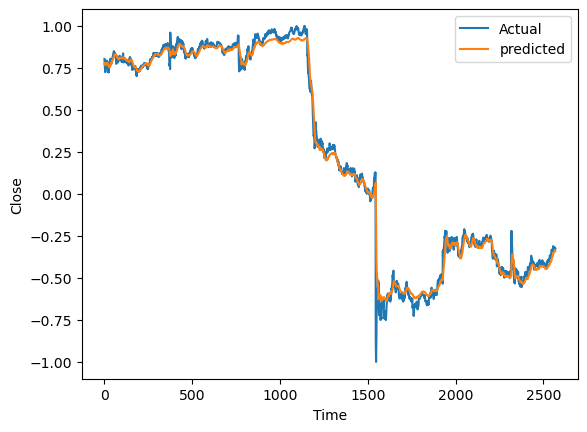

In [22]:
plt.plot(y_train,label="Actual")
plt.plot(predicted[:,0],label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [23]:
dummies=np.zeros((x_train.shape[0],lookback+1))
dummies[:,0]=predicted[:,0]
dummies=scalar.inverse_transform(dummies)
train_prediction=dc(dummies[:,0])
train_prediction

array([188.11545459, 188.16421376, 188.14171527, ..., 179.12879341,
       179.13227845, 179.12711802])

In [24]:
dummies=np.zeros((x_train.shape[0],lookback+1))
dummies[:,0]=y_train.flatten()
dummies=scalar.inverse_transform(dummies)
new_y_train=dc(dummies[:,0])
new_y_train

array([188.36000057, 188.15849327, 188.02999889, ..., 179.27999871,
       179.24999992, 179.24000553])

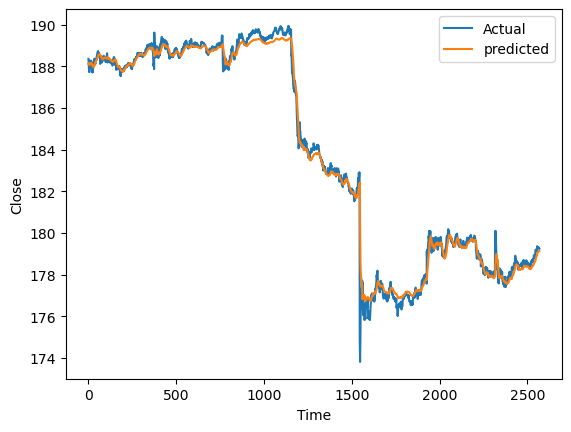

In [25]:
plt.plot(new_y_train,label="Actual")
plt.plot(train_prediction,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [26]:
dummies=np.zeros((x_test.shape[0],lookback+1))
dummies[:,:4]=model(x_test.to(device)).detach().cpu().numpy()
dummies=scalar.inverse_transform(dummies)
test_prediction=dc(dummies[:,0])
test_prediction

array([179.13588329, 179.11910384, 179.09165037, 179.09740455,
       179.08367854, 179.08065879, 179.05466708, 179.05881034,
       179.0663934 , 179.06509523, 179.06123008, 179.06266201,
       179.05305135, 179.03688105, 179.01689805, 179.00549122,
       179.02777849, 179.06321871, 179.09131453, 179.12912205,
       179.1229738 , 179.14183137, 179.14149408, 179.13283467,
       179.11828539, 179.09819413, 179.06961042, 179.07879526,
       179.09880039, 179.13622683, 179.16719998, 179.20361887,
       179.22446699, 179.22376065, 179.22219015, 179.22975878,
       179.25332304, 179.27730398, 179.28972702, 179.29222568,
       179.29369465, 179.3255233 , 179.34812813, 179.36347276,
       179.35530076, 179.35644977, 179.37075557, 179.35770367,
       179.3701676 , 179.36996792, 179.37967289, 179.36651512,
       179.36519916, 179.35571456, 179.35163   , 179.34348158,
       179.33948748, 179.33983103, 179.31741577, 179.33388728,
       179.33201942, 179.32537173, 179.31705972, 179.32

In [27]:
dummies=np.zeros((x_test.shape[0],lookback+1))
dummies[:,0]=y_test.flatten()
dummies=scalar.inverse_transform(dummies)
new_y_test=dc(dummies[:,0])
new_y_test

array([179.10000617, 179.1501008 , 179.19000232, 179.19000232,
       179.17990112, 179.06350717, 179.18989575, 179.24000553,
       179.20500172, 179.19999695, 179.21000673, 179.16130073,
       179.12499996, 179.0449982 , 179.15499876, 179.24499515,
       179.35499571, 179.38999927, 179.46000665, 179.33999631,
       179.33000192, 179.25999454, 179.24499515, 179.17999278,
       179.10499579, 179.05999759, 179.22000112, 179.35499571,
       179.39500429, 179.42889397, 179.47999566, 179.49000545,
       179.33999631, 179.4299927 , 179.40739436, 179.53500364,
       179.52780142, 179.50500484, 179.44999687, 179.44560244,
       179.50999446, 179.50000007, 179.52999887, 179.41999807,
       179.44970697, 179.51499947, 179.49989326, 179.48109439,
       179.50680534, 179.47000128, 179.41999807, 179.47000128,
       179.44500725, 179.44999687, 179.37500012, 179.43800351,
       179.42010489, 179.38000489, 179.50999446, 179.41000368,
       179.4149933 , 179.40910344, 179.47000128, 179.48

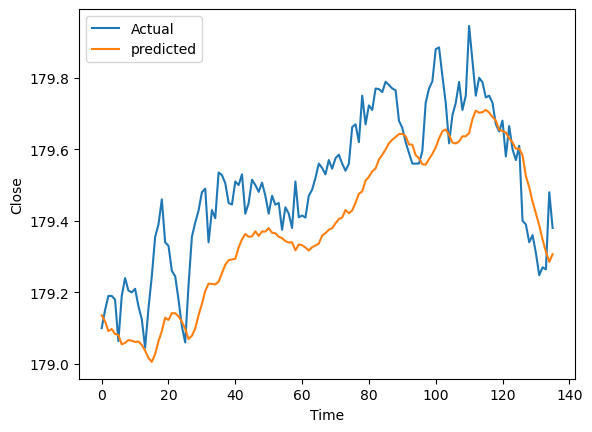

In [28]:
plt.plot(new_y_test,label="Actual")
plt.plot(test_prediction,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [29]:
torch.cuda.empty_cache()